In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Input

/Users/andrewlou/Documents/Coding/Projects/stock-price-predictor/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/andrewlou/Documents/Coding/Projects/stock-price-predictor/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/andrewlou/Documents/Coding/Projects/stock-price-predictor/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly o

In [2]:
base_dir = os.getcwd()
data_file_path = os.path.join(base_dir, "stock_data.npz")

In [3]:
data = np.load("stock_data.npz")

X = data['X_data']
Y = data['Y_data']

print(f"X shape : {X.shape}")
print(f"Y shape : {Y.shape}")

X shape : (7948, 60)
Y shape : (7948,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6358, 60) (6358,) (1590, 60) (1590,)


In [5]:
model = Sequential([
    Input(shape=(60,)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    Dense(1),
    Activation('sigmoid')
])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,313 (83.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.6373 - loss: 0.6343
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6600 - loss: 0.5955
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.6689 - loss: 0.5771
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.6751 - loss: 0.5658
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.6780 - loss: 0.5676
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6793 - loss: 0.5581
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6966 - loss: 0.5503
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6964 - loss: 0.5480
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7045 - loss: 0.5488
Epoch 10/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7122 - loss: 0.5327
Epoch 11/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7092 - loss: 0.5377
Epoch 12/50
199/199 ━━━━━━━━━━

Text(0, 0.5, 'Accuracy')

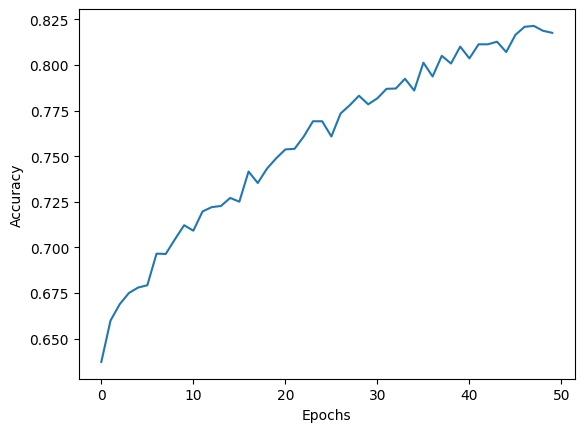

In [8]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50)

plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [18]:
model.save("stock_model.keras")

y_preds = np.round(model.predict(X_test))

test_acc = np.mean(y_preds == y_test)
print(f"Accuracy: {test_acc}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
Accuracy: 0.5275970096119615


In [9]:
## Model takes 60 days of stock movements as input (close - open), returns up or down (binary classification)

## TODO: split data into months, and train
## create labels for training, testing

